#Import Library

In [ ]:
import urllib.request
import json
import sys
import os
import glob
import pandas as pd

#Donwload Query

In [ ]:
corepath="/content/drive/MyDrive/Data_bird_mp3/"

In [ ]:
def save_json(searchTerms, birdName, country):
    numPages = 1
    page = 1
    
    path = corepath + birdName.replace(':', '') + "/"
    if not os.path.exists(path):
        print("Creating subdirectory " + path + " for downloaded files...")
        os.makedirs(path)
        
    while page < numPages + 1:
        print("Loading page " + str(page) + "...")
        url = 'https://www.xeno-canto.org/api/2/recordings?query={0}&page={1}'.format(searchTerms.replace(' ', '%20'),
                                                                                      page)
        print(url)
        jsonPage = urllib.request.urlopen(url)
        jsondata = json.loads(jsonPage.read().decode('utf-8'))
        filename = corepath + birdName.replace(':', '') + "_jsondata_p" + str(page) + ".json"
        with open(filename, 'w') as outfile:
            json.dump(jsondata, outfile)
        
        numPages = jsondata['numPages']
        page = page + 1
    print("Found ", numPages, " pages in total.")
    
    print("Saved json for ", (numPages - 1) * 500 + len(jsondata['recordings']), " files")
    return path

In [ ]:
def read_data(searchTerm, path, birdName):
    data = []
    numPages = 1
    page = 1
    
    while page < numPages + 1:
        with open(corepath + birdName.replace(':', '') + "_jsondata_p" + str(page) + ".json", 'r') as jsonfile:
            jsondata = jsonfile.read()
        jsondata = json.loads(jsondata)
        numPages = jsondata['numPages']
        for k in range(len(jsondata['recordings'])):
            data.append(jsondata["recordings"][k][searchTerm])
        page = page + 1
    return data

In [ ]:
def download(searchTerms, birdName, country):
    path = save_json(searchTerms, birdName, country)
    filenamesID = read_data('id', path, birdName)
    filenamesCountry = read_data('cnt', path, birdName)
    fileaddress = read_data('file', path, birdName)
    numfiles = len(filenamesID)
    print("A total of ", numfiles, " files will be downloaded")
    for i in range(0, numfiles):
        print("Saving file ", i + 1, "/", numfiles,
              corepath + filenamesID[i] + birdName.replace(':', '') + ".mp3")
        urllib.request.urlretrieve("http:" + fileaddress[i],
                                   path + "/" + filenamesID[i] + birdName  + ".mp3")
    return print("===============Done Download==============")

#Download per Species

In [ ]:
birds = ['Caprimulgus macrurus', 'Pnoepyga pusilla',
         'Malacocincla sepiaria','Malacopteron affine']

In [ ]:
for bird in birds:
    download(bird + '%20type:song', bird.replace(' ', ''), 'countries')

    jsonFile = open(corepath + bird.replace(' ', '') + "_jsondata_p1" + ".json", 'r')
    values = json.load(jsonFile)
    jsonFile.close()

    # Create a pandas dataframe of records & convert to .csv file
    record_df = pd.DataFrame(values['recordings'])
    record_df.to_csv(corepath+ bird.replace(' ', '') + ".csv", index=False)

Creating subdirectory /content/drive/MyDrive/Data_bird_mp3/Caprimulgusmacrurus/ for downloaded files...
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Caprimulgus%20macrurus%20type:song&page=1
Found  1  pages in total.
Saved json for  120  files
A total of  120  files will be downloaded
Saving file  1 / 120 /content/drive/MyDrive/Data_bird_mp3/685673Caprimulgusmacrurus.mp3
Saving file  2 / 120 /content/drive/MyDrive/Data_bird_mp3/677153Caprimulgusmacrurus.mp3
Saving file  3 / 120 /content/drive/MyDrive/Data_bird_mp3/664203Caprimulgusmacrurus.mp3
Saving file  4 / 120 /content/drive/MyDrive/Data_bird_mp3/664135Caprimulgusmacrurus.mp3
Saving file  5 / 120 /content/drive/MyDrive/Data_bird_mp3/660409Caprimulgusmacrurus.mp3
Saving file  6 / 120 /content/drive/MyDrive/Data_bird_mp3/649229Caprimulgusmacrurus.mp3
Saving file  7 / 120 /content/drive/MyDrive/Data_bird_mp3/649228Caprimulgusmacrurus.mp3
Saving file  8 / 120 /content/drive/MyDrive/Data_bird_mp3/649227Caprimulgus

In [ ]:
# List all Species here:
birds = ['Anthipes solitaris', 'Anthracoceros albirostris']

In [ ]:
for bird in birds:
    download(bird +'%20type:song', bird.replace(' ', ''), 'countries')

    #Convert Json per species into csv file
    # Get the json entries from your downloaded json
    jsonFile = open(corepath + bird.replace(' ', '') + "_jsondata_p1" + ".json", 'r')
    values = json.load(jsonFile)
    jsonFile.close()

    # Create a pandas dataframe of records & convert to .csv file
    record_df = pd.DataFrame(values['recordings'])
    record_df.to_csv(corepath+ bird.replace(' ', '') + ".csv", index=False)

Creating subdirectory /content/drive/MyDrive/Data_bird_mp3/Anthipessolitaris/ for downloaded files...
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Anthipes%20solitaris%20type:song&page=1
Found  1  pages in total.
Saved json for  53  files
A total of  53  files will be downloaded
Saving file  1 / 53 /content/drive/MyDrive/Data_bird_mp3/645714Anthipessolitaris.mp3
Saving file  2 / 53 /content/drive/MyDrive/Data_bird_mp3/506376Anthipessolitaris.mp3
Saving file  3 / 53 /content/drive/MyDrive/Data_bird_mp3/503508Anthipessolitaris.mp3
Saving file  4 / 53 /content/drive/MyDrive/Data_bird_mp3/490588Anthipessolitaris.mp3
Saving file  5 / 53 /content/drive/MyDrive/Data_bird_mp3/451104Anthipessolitaris.mp3
Saving file  6 / 53 /content/drive/MyDrive/Data_bird_mp3/451094Anthipessolitaris.mp3
Saving file  7 / 53 /content/drive/MyDrive/Data_bird_mp3/409382Anthipessolitaris.mp3
Saving file  8 / 53 /content/drive/MyDrive/Data_bird_mp3/409381Anthipessolitaris.mp3
Saving file  9 / 

In [ ]:
# List all Species here:
birds = ['Corvus enca', 'Dryocopus javensis', 'Elanus caeruleus']

In [ ]:
for bird in birds:
    download(bird + '%20type:call', bird.replace(' ', ''), 'countries')

    #Convert Json per species into csv file
    # Get the json entries from your downloaded json
    jsonFile = open(corepath + bird.replace(' ', '') + "_jsondata_p1" + ".json", 'r')
    values = json.load(jsonFile)
    jsonFile.close()

    # Create a pandas dataframe of records & convert to .csv file
    record_df = pd.DataFrame(values['recordings'])
    record_df.to_csv(corepath+ bird.replace(' ', '') + ".csv", index=False)

Creating subdirectory /content/drive/MyDrive/Data_bird_mp3/Corvusenca/ for downloaded files...
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Corvus%20enca%20type:call&page=1
Found  1  pages in total.
Saved json for  113  files
A total of  113  files will be downloaded
Saving file  1 / 113 /content/drive/MyDrive/Data_bird_mp3/628125Corvusenca.mp3
Saving file  2 / 113 /content/drive/MyDrive/Data_bird_mp3/616145Corvusenca.mp3
Saving file  3 / 113 /content/drive/MyDrive/Data_bird_mp3/616142Corvusenca.mp3
Saving file  4 / 113 /content/drive/MyDrive/Data_bird_mp3/616141Corvusenca.mp3
Saving file  5 / 113 /content/drive/MyDrive/Data_bird_mp3/614886Corvusenca.mp3
Saving file  6 / 113 /content/drive/MyDrive/Data_bird_mp3/614885Corvusenca.mp3
Saving file  7 / 113 /content/drive/MyDrive/Data_bird_mp3/614882Corvusenca.mp3
Saving file  8 / 113 /content/drive/MyDrive/Data_bird_mp3/614881Corvusenca.mp3
Saving file  9 / 113 /content/drive/MyDrive/Data_bird_mp3/614880Corvusenca.mp

In [ ]:
# List all Species here:
birds = ['Orthotomus sericeus', 'Pachycephala cinerea', 'Dicrurus paradiseus',
         'Phylloscopus borealis', 'Eudynamys scolopaceus', 'Macronus gularis']

In [ ]:
for bird in birds:
    download(bird + '%20type:song', bird.replace(' ', ''), 'countries')

    #Convert Json per species into csv file
    # Get the json entries from your downloaded json
    jsonFile = open(corepath + bird.replace(' ', '') + "_jsondata_p1" + ".json", 'r')
    values = json.load(jsonFile)
    jsonFile.close()

    # Create a pandas dataframe of records & convert to .csv file
    record_df = pd.DataFrame(values['recordings'])
    record_df.to_csv(corepath+ bird.replace(' ', '') + ".csv", index=False)

Creating subdirectory /content/drive/MyDrive/Data_bird_mp3/Orthotomussericeus/ for downloaded files...
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Orthotomus%20sericeus%20type:song&page=1
Found  1  pages in total.
Saved json for  92  files
A total of  92  files will be downloaded
Saving file  1 / 92 /content/drive/MyDrive/Data_bird_mp3/665779Orthotomussericeus.mp3
Saving file  2 / 92 /content/drive/MyDrive/Data_bird_mp3/663167Orthotomussericeus.mp3
Saving file  3 / 92 /content/drive/MyDrive/Data_bird_mp3/657597Orthotomussericeus.mp3
Saving file  4 / 92 /content/drive/MyDrive/Data_bird_mp3/578703Orthotomussericeus.mp3
Saving file  5 / 92 /content/drive/MyDrive/Data_bird_mp3/578702Orthotomussericeus.mp3
Saving file  6 / 92 /content/drive/MyDrive/Data_bird_mp3/561669Orthotomussericeus.mp3
Saving file  7 / 92 /content/drive/MyDrive/Data_bird_mp3/523422Orthotomussericeus.mp3
Saving file  8 / 92 /content/drive/MyDrive/Data_bird_mp3/523421Orthotomussericeus.mp3
Saving 

In [ ]:
# List all Species here:
birds = ['Anthracoceros albirostris']

In [ ]:
for bird in birds:
    download(bird + '%20type:call', bird.replace(' ', ''), 'countries')

    #Convert Json per species into csv file
    # Get the json entries from your downloaded json
    jsonFile = open(corepath + bird.replace(' ', '') + "_jsondata_p1" + ".json", 'r')
    values = json.load(jsonFile)
    jsonFile.close()

    # Create a pandas dataframe of records & convert to .csv file
    record_df = pd.DataFrame(values['recordings'])
    record_df.to_csv(corepath+ bird.replace(' ', '') + ".csv", index=False)

Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Anthracoceros%20albirostris%20type:call&page=1
Found  1  pages in total.
Saved json for  70  files
A total of  70  files will be downloaded
Saving file  1 / 70 /content/drive/MyDrive/Data_bird_mp3/498032Anthracocerosalbirostris.mp3
Saving file  2 / 70 /content/drive/MyDrive/Data_bird_mp3/669536Anthracocerosalbirostris.mp3
Saving file  3 / 70 /content/drive/MyDrive/Data_bird_mp3/665731Anthracocerosalbirostris.mp3
Saving file  4 / 70 /content/drive/MyDrive/Data_bird_mp3/578696Anthracocerosalbirostris.mp3
Saving file  5 / 70 /content/drive/MyDrive/Data_bird_mp3/502370Anthracocerosalbirostris.mp3
Saving file  6 / 70 /content/drive/MyDrive/Data_bird_mp3/486906Anthracocerosalbirostris.mp3
Saving file  7 / 70 /content/drive/MyDrive/Data_bird_mp3/473857Anthracocerosalbirostris.mp3
Saving file  8 / 70 /content/drive/MyDrive/Data_bird_mp3/472575Anthracocerosalbirostris.mp3
Saving file  9 / 70 /content/drive/MyDrive/Data_bird_mp3

#Convert Meta Data

In [ ]:
os.chdir(corepath)

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "birds_metadata.csv", index=False, encoding='utf-8-sig')
print("==========Done Convert CSV========")

==========Done Convert CSV========


In [ ]:
df = pd.read_csv(corepath + '/birds_metadata.csv', delimiter=',')

In [ ]:
df.head()

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,alt,type,url,file,file-name,sono,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,685673,Caprimulgus,macrurus,NaN,Large-tailed Nightjar,AUDEVARD Aurélien,Australia,"Crystal Creek, Townsville City, Queensland",-18.9800,146.2542,50,"adult, male, song",//www.xeno-canto.org/685673,//www.xeno-canto.org/685673/download,XC685673-Engoulevent de Horsfield 07122019 - B...,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:26,19:00,2019-12-07,2021-11-10,[''],NaN,no,no
1,677153,Caprimulgus,macrurus,NaN,Large-tailed Nightjar,Abdus Shakur,India,"Wildlife Institute of India, Dehradun, Uttarak...",30.2825,77.9748,600,"adult, sex uncertain, song",//www.xeno-canto.org/677153,//www.xeno-canto.org/677153/download,XC677153-Large_tailed_Nightjar_WII_H.wav,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:12,20:30,2020-03-29,2021-09-28,['Vanellus indicus'],was calling from the roof and flew later,yes,no
2,664203,Caprimulgus,macrurus,schlegelii,Large-tailed Nightjar,James Lambert,Australia,"Charles Darwin University, Darwin Municipality...",-12.3764,130.8679,10,"adult, song",//www.xeno-canto.org/664203,//www.xeno-canto.org/664203/download,XC664203-large-tailed nightjar 18_53_50.mp3,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:37,18:53,2021-06-17,2021-07-21,[''],gaps between successive groups of notes are fr...,yes,no
3,664135,Caprimulgus,macrurus,schlegelii,Large-tailed Nightjar,James Lambert,Australia,"Charles Darwin University, Darwin Municipality...",-12.3764,130.8679,10,"adult, song",//www.xeno-canto.org/664135,//www.xeno-canto.org/664135/download,XC664135-large-tailed nightjar 06_30_53.mp3,{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-nd/4.0/,A,0:32,06:30,2021-06-08,2021-07-21,[''],background noise of flying fox colony,yes,no
4,660409,Caprimulgus,macrurus,NaN,Large-tailed Nightjar,Asim Giri,India,"Egra (near Rukminipur), Purba Medinipur, West...",21.8941,87.5794,10,"adult, sex uncertain, song",//www.xeno-canto.org/660409,//www.xeno-canto.org/660409/download,"XC660409-29 Apr, 6.30 pm - Large-tailed Nightj...",{'small': '//www.xeno-canto.org/sounds/uploade...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:16,18:33,2021-04-29,2021-07-01,[''],NaN,yes,no


In [ ]:
df.shape

(5305, 26)

#Total of .wav files

In [ ]:
blist=[]
for root, dirs, files in os.walk(corepath):
    for file in files:
        if file.endswith(".mp3"):
            blist.append(os.path.join(root, file))
                
print('Found ', len(blist),' files.')

Found  1518  files.


In [ ]:
df['q'].value_counts()

A           2300
B           1854
C            659
no score     312
D            163
E             17
Name: q, dtype: int64

In [ ]:
sum(df['en'].value_counts() >= 100) / df['en'].nunique()

1.0

In [ ]:
sum(df['en'].value_counts() <= 100) / df['en'].nunique()

0.0

In [ ]:
pip install pydub

In [ ]:
pip install sox

In [ ]:
!apt-get install libsox-fmt-all libsox-dev sox > /dev/null

In [ ]:
!apt-get install sox libsox-dev libsox-fmt-all

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsox-dev is already the newest version (14.4.2-3ubuntu0.18.04.1).
libsox-fmt-all is already the newest version (14.4.2-3ubuntu0.18.04.1).
sox is already the newest version (14.4.2-3ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!pip install ffmpeg-python > /dev/null

In [ ]:
import pandas as pd
import numpy as np
import os
from pydub import AudioSegment
from glob import glob
import sox
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import pickle

import IPython.display as ipd

In [ ]:
audio_files = glob(os.path.join('/content/drive/MyDrive/Data_bird_mp3/*', '*.mp3'), recursive=True)

In [ ]:
# check if we already have a stored version of this data
path = 'dataframes'
fname = os.path.join(path,'audio_files2_df.pkl')


if os.path.exists(fname):
    # Load the dataframe if it is saved
    with open(fname, 'rb') as fp:
        audio_files_df = pickle.load(fp)
    print('Loaded dataframe from disk')

else:
    # data holder
    stats = {
        'duration': [],
        'sample_rate': [],
        'bitrate': [],
        'bird_id': [],
        'file_name': []
    }

    # loop through files to extract metrics
    for af in tqdm(audio_files):    
        stats['duration'].append(sox.file_info.duration(af))
        stats['sample_rate'].append(sox.file_info.sample_rate(af))    
        stats['bitrate'].append(sox.file_info.bitrate(af))

        path_split = af.split('/')
        stats['bird_id'].append(path_split[-2])
        stats['file_name'].append(path_split[-1])

    # create the dataframe from stats
    audio_files_df = pd.DataFrame(stats)
    
    # save the dataframe
    os.makedirs(path, exist_ok=True)
    with open(fname, 'wb') as fp:
        pickle.dump(audio_files_df, fp)

100%|██████████| 1518/1518 [13:25<00:00,  1.88it/s]


In [ ]:
colors = ['#6c503e', '#446652','#8C93A8', '#ED7D3A', '#B5C2B7']

In [ ]:
# plot
fig = px.scatter_geo(df,
                    lat=df.lat,
                    lon=df.lng,
                    title='Bird Recording Locations',
                    color_discrete_sequence=[colors[1]]
)

# from hex to rgb color with transparency
h = colors[2].lstrip('#')
rgb_landcolor = list(int(h[i:i+2], 16) for i in (0, 2, 4))
rgb_landcolor.append(0.3) # opacity
rgb_landcolor = 'rgba'+str(tuple(rgb_landcolor))

# set colors
fig.update_layout(
    go.Layout(
        geo = dict(
            landcolor = rgb_landcolor
        ),
        # for presentation
        # paper_bgcolor='rgba(0,0,0,0)',
        # plot_bgcolor='rgba(0,0,0,0)'
    )
)
fig.show()

In [ ]:
# look at df
audio_files_df.head()

,duration,sample_rate,bitrate,bird_id,file_name
0,26.103000,48000.0,321000.0,Caprimulgusmacrurus,685673Caprimulgusmacrurus.mp3
1,12.842993,44100.0,131000.0,Caprimulgusmacrurus,677153Caprimulgusmacrurus.mp3
2,37.392000,48000.0,96500.0,Caprimulgusmacrurus,664203Caprimulgusmacrurus.mp3
3,32.976000,48000.0,93400.0,Caprimulgusmacrurus,664135Caprimulgusmacrurus.mp3
4,16.873000,48000.0,194000.0,Caprimulgusmacrurus,660409Caprimulgusmacrurus.mp3


In [ ]:
# descriptive statistics
audio_files_df.describe()

,duration,sample_rate,bitrate
count,1518.000000,1518.000000,1518.000000
mean,46.296311,44780.401845,199241.370224
std,51.299421,2804.500627,79544.399288
min,2.146009,16000.000000,64200.000000
25%,19.050750,44100.000000,129000.000000
50%,33.100499,44100.000000,193000.000000
75%,56.380501,44100.000000,259000.000000
max,933.999002,48000.000000,338000.000000


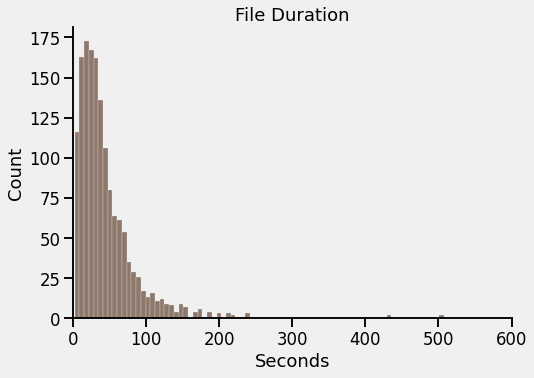

In [ ]:
# plot file duration
with plt.style.context('fivethirtyeight'), sns.plotting_context("talk", 
                                                                font_scale=1):
    
    # create fig and plot
    fig = plt.figure(figsize=(7,5))
    ax = sns.histplot(audio_files_df['duration'], color=colors[0])
    
    # xaxis range (crop off outliers)
    plt.xlim([0, 600])
    
    # labels
    plt.title('File Duration')
    plt.xlabel('Seconds')
    
    # formatting    
    plt.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

In [ ]:
audio_files_df[audio_files_df['duration'] > 20]

,duration,sample_rate,bitrate,bird_id,file_name
0,26.103000,48000.0,321000.0,Caprimulgusmacrurus,685673Caprimulgusmacrurus.mp3
2,37.392000,48000.0,96500.0,Caprimulgusmacrurus,664203Caprimulgusmacrurus.mp3
3,32.976000,48000.0,93400.0,Caprimulgusmacrurus,664135Caprimulgusmacrurus.mp3
5,77.616000,48000.0,94300.0,Caprimulgusmacrurus,649229Caprimulgusmacrurus.mp3
6,25.248000,48000.0,94800.0,Caprimulgusmacrurus,649228Caprimulgusmacrurus.mp3
...,...,...,...,...,...
1509,26.842993,44100.0,129000.0,Macronusgularis,190301Macronusgularis.mp3
1510,87.382000,48000.0,256000.0,Macronusgularis,96569Macronusgularis.mp3
1511,74.754000,48000.0,320000.0,Macronusgularis,96568Macronusgularis.mp3
1516,20.695011,44100.0,65600.0,Macronusgularis,68614Macronusgularis.mp3


In [ ]:
audio_files_df = audio_files_df.sort_values('duration', ascending=False)
audio_files_df.head()

,duration,sample_rate,bitrate,bird_id,file_name
1322,933.999002,44100.0,320000.0,Phylloscopusborealis,661770Phylloscopusborealis.mp3
882,502.713991,44100.0,160000.0,Elanuscaeruleus,433770Elanuscaeruleus.mp3
1181,500.991000,48000.0,320000.0,Phylloscopusborealis,485853Phylloscopusborealis.mp3
38,466.456000,48000.0,320000.0,Caprimulgusmacrurus,365142Caprimulgusmacrurus.mp3
881,434.945011,44100.0,192000.0,Elanuscaeruleus,433771Elanuscaeruleus.mp3


TypeError: ignored

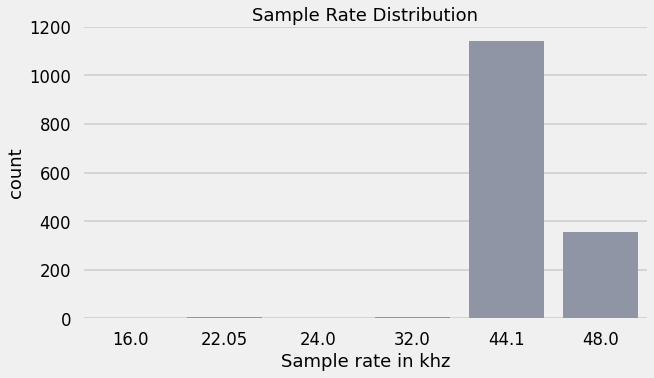

In [ ]:
# plot sample rate distribution
with plt.style.context('fivethirtyeight'), sns.plotting_context("talk", font_scale=1):
    
    # create figure and plot
    fig = plt.figure(figsize=(9,5))
    ax = sns.countplot(x = audio_files_df['sample_rate']/1000,
                       color=colors[2])
    
    # formatting
    plt.title('Sample Rate Distribution');
    plt.xlabel('Sample rate in khz')
    plt.box(on=False)
    ax.tick_params(axis='both', bottom=False, left=False)
    ax.yaxis.set_major_formatter(lambda x, pos: str(int(x/1000)) + 'k')

    # make transparent for presentation
    fig.set_facecolor('None')
    ax.set_facecolor('None')

Text(0.5, 1.0, 'Bitrate Distribution')

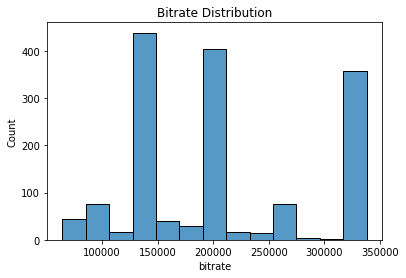

In [ ]:
# plot bitrate distribution
sns.histplot(audio_files_df['bitrate'])
plt.title('Bitrate Distribution')

Text(0.5, 1.0, 'Bitrate (< 500khz) Distribution')

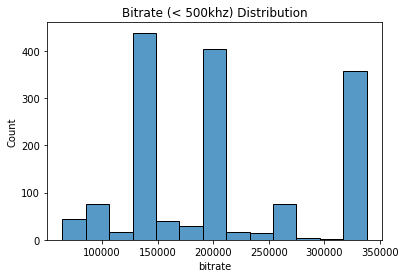

In [ ]:
# plot bitrates below 500khz
sns.histplot(audio_files_df[audio_files_df['bitrate'] < 500000]['bitrate'])
plt.title('Bitrate (< 500khz) Distribution')

Selected random files number: [532, 103, 1824, 1803, 1333, 609, 1140, 1822, 68, 1483]


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


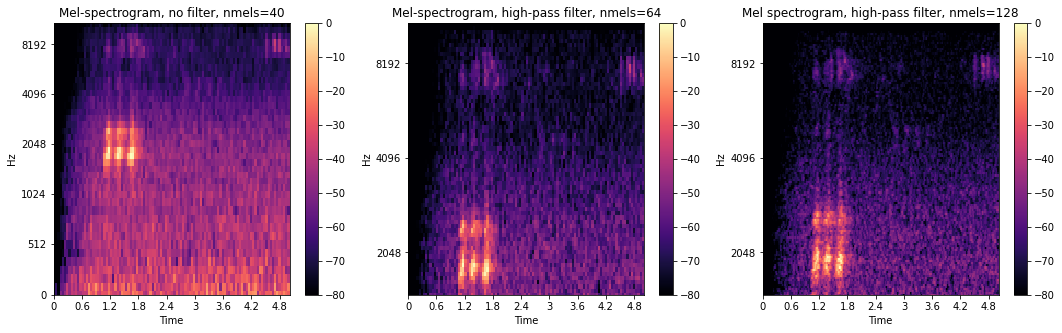

*******************************************


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


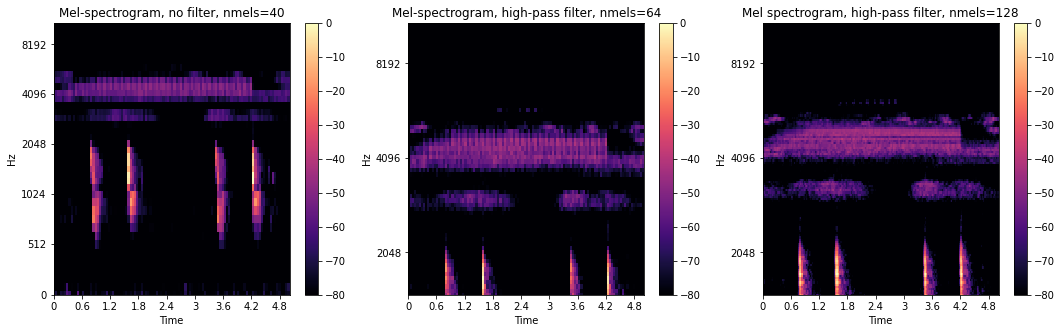

*******************************************


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


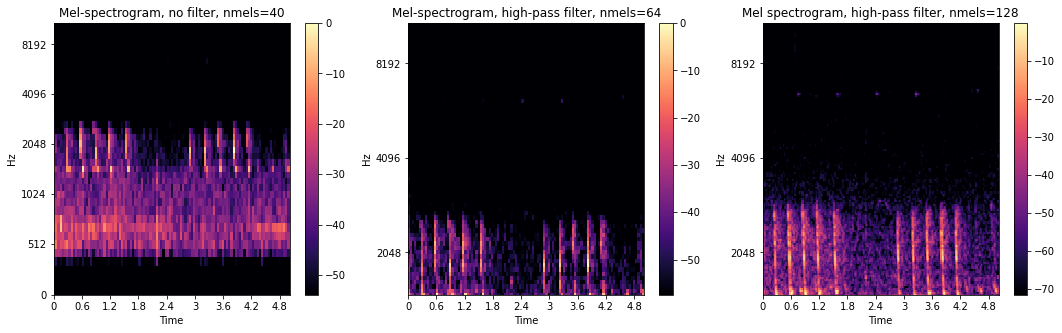

*******************************************


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


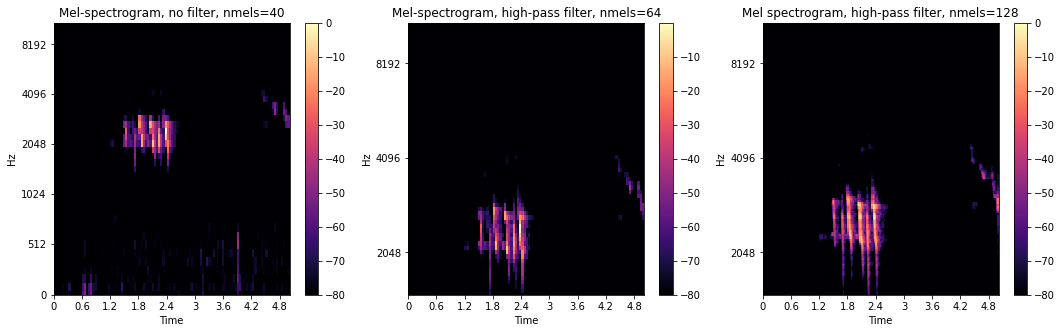

*******************************************


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


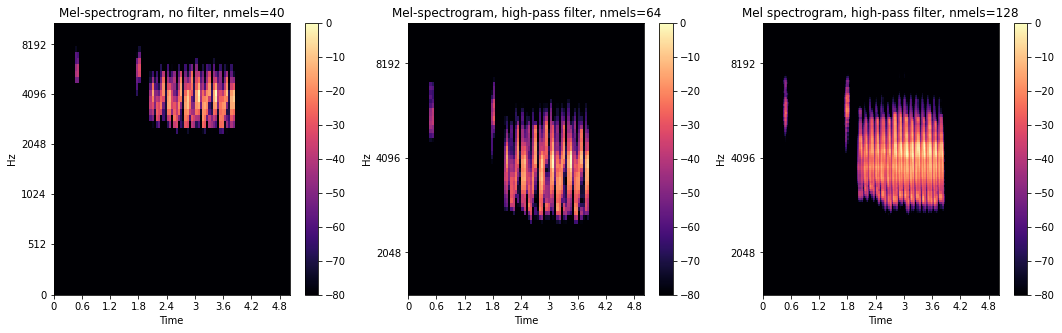

*******************************************


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


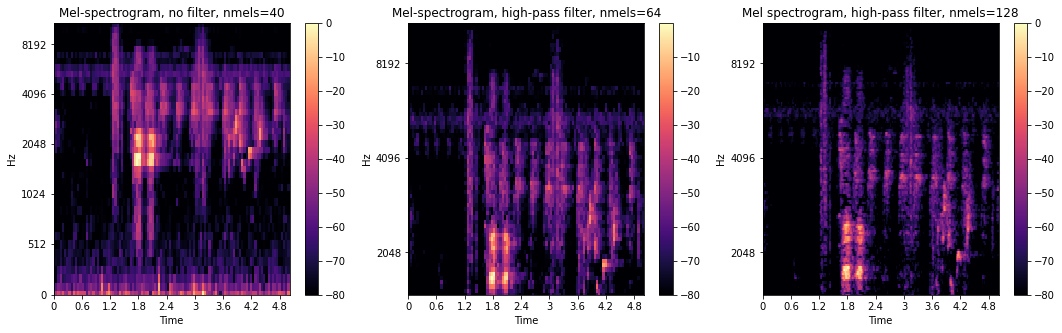

*******************************************


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


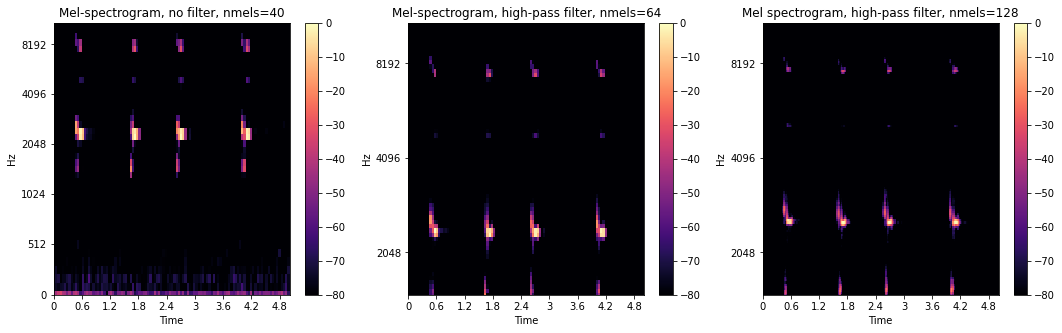

*******************************************


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


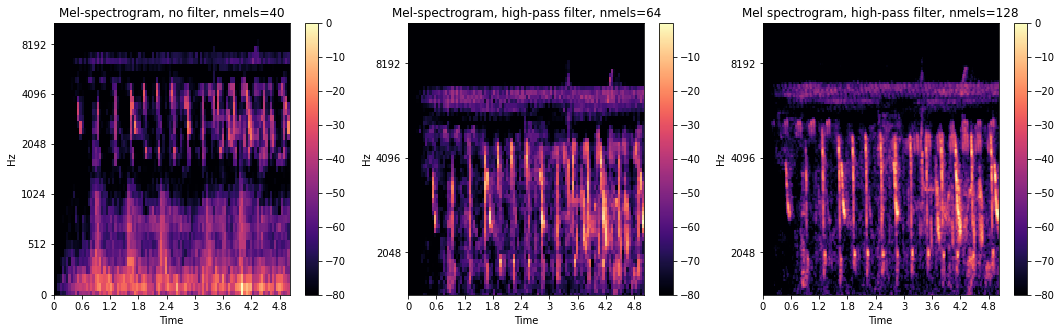

*******************************************


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


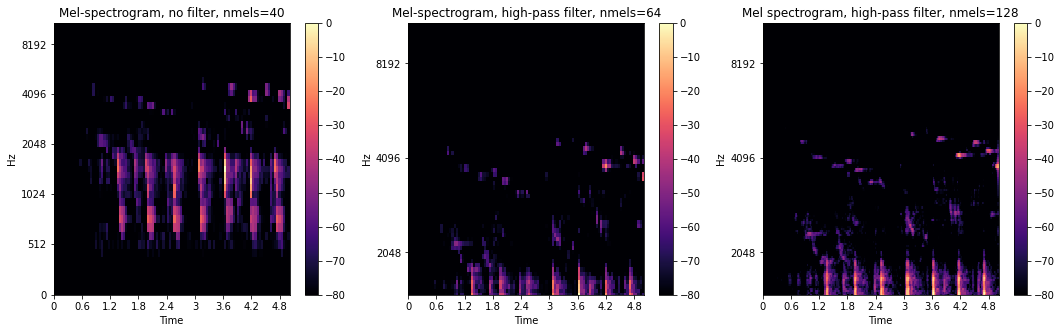

*******************************************


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


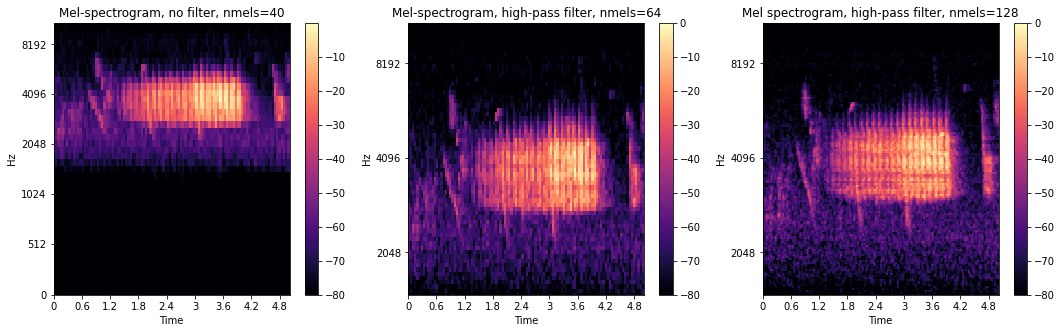

*******************************************


In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import librosa.display
import numpy as np
from random import sample

randFiles = sample(range(len(blist)), 10)
print('Selected random files number:',randFiles)

for audioFile in randFiles:
    data, sr = librosa.load(blist[audioFile], duration=5) # sr = sampling rate

    N_FFT = 1024         # Number of frequency bins for Fast Fourier Transform
    HOP_SIZE = 1024      # Number of audio frames between STFT columns
    N_MELS = 40          # Mel band parameters   
    WIN_SIZE = 512      # number of samples in each STFT window
    WINDOW_TYPE = 'hann' # the windowin function
    FEATURE = 'mel'      # feature representation

    f, axs = plt.subplots(1,3,figsize=(18,5))
    plt.subplot(1,3,1)
    librosa.display.specshow(
        librosa.core.amplitude_to_db(
            librosa.feature.melspectrogram(
                            y=data,
                            sr=sr, 
                            n_fft=N_FFT, 
                            hop_length=HOP_SIZE, 
                            n_mels=N_MELS, 
                            htk=True, 
                            fmin=0.0, 
                            fmax=sr/2.0), 
                ref=np.max),
            sr=sr,
            hop_length=HOP_SIZE, 
            x_axis='time', 
            y_axis='mel')
    
    plt.colorbar()
    plt.title('Mel-spectrogram, no filter, nmels='  +str(N_MELS))


    # MK_spectrogram modified
    N_FFT = 1024         
    HOP_SIZE = 1024      
    N_MELS = 64          # Higher   
    WIN_SIZE = 512      
    WINDOW_TYPE = 'hann'
    FEATURE = 'mel'      
    FMIN = 1500
    
    plt.subplot(1,3,2)
    librosa.display.specshow(
                librosa.core.amplitude_to_db(
                    librosa.feature.melspectrogram(
                                    y=data, 
                                    sr=sr, 
                                    n_fft=N_FFT, 
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, # higher limit ##high-pass filter freq.
                                    fmax=sr/2), # higher limit ##sr/2 = max
                        ref=np.max),
                    sr=sr,
                    hop_length=HOP_SIZE, 
                    x_axis='time', 
                    y_axis='mel',
                    fmin=FMIN) #fmin -correct plot scale frequency parameter
    plt.title('Mel-spectrogram, high-pass filter, nmels=' +str(N_MELS))
    plt.colorbar()
    
    plt.subplot(1,3,3)
    n_mels=128
    S = librosa.feature.melspectrogram(y=data, sr=sr, fmin=FMIN) #AMPLITUDE
    librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max),
                              y_axis='mel', x_axis='time', fmin=FMIN)
    plt.title('Mel spectrogram, high-pass filter, nmels=' +str(n_mels))
    plt.colorbar()
    plt.show()

    print('*******************************************')